In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# additional lib
import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [2]:
# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import statsmodels.api as sm

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, StratifiedKFold, KFold
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# pycaret
import pycaret

In [3]:
df = pd.read_csv('D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\clean_data.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
1,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
2,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
3,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
4,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000
...,...,...,...,...,...,...,...,...,...,...
3802,CX9,Qassim,Mazda,Automatic,Saudi,Full,2020,2.0,9500,132000
3803,Suburban,Riyadh,GMC,Automatic,Saudi,Full,2006,5.3,86000,50000
3804,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,68000
3805,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,145000


<Axes: xlabel='Price', ylabel='Density'>

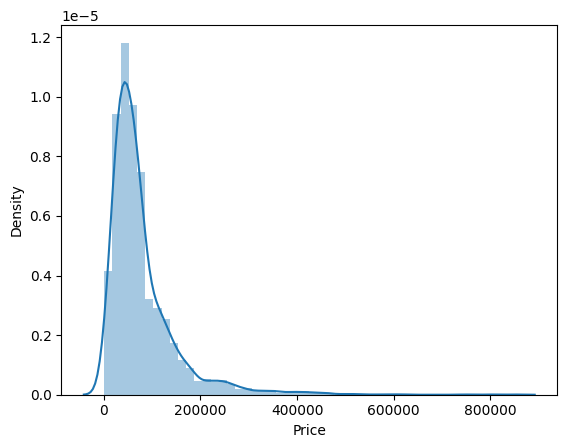

In [4]:
sns.distplot(df['Price'])

In [5]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3807.000000,3807.000000,3807.000000,3807.000000
mean,2014.877857,3.180483,127682.531915,78244.048332
std,5.092528,1.459362,110759.028366,72807.414236
min,1963.000000,1.000000,100.000000,500.000000
25%,2013.000000,2.000000,48000.000000,35000.000000
50%,2016.000000,2.700000,102113.000000,58000.000000
75%,2018.000000,4.000000,181000.000000,95000.000000
max,2021.000000,9.000000,900000.000000,850000.000000


In [6]:
# data spliting

train, test = train_test_split(
    df,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(3045, 10) (762, 10)


In [7]:
# setup
from pycaret.regression import *

setup(
    # general setup
    data=train, 
    train_size=0.9,
    verbose=True,

    # data wrangling
    preprocess=True,
    
    # # feature selection
    # ignore_features=['Region', 'Origin']

    # transformation
    transform_target=True
)

,Description,Value
0,Session id,3516
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3045, 10)"
4,Transformed data shape,"(3045, 15)"
5,Transformed train set shape,"(2740, 15)"
6,Transformed test set shape,"(305, 15)"
7,Ordinal features,1
8,Numeric features,3
9,Categorical features,6


In [8]:
norm = get_config('dataset_transformed')

<Axes: xlabel='Price', ylabel='Density'>

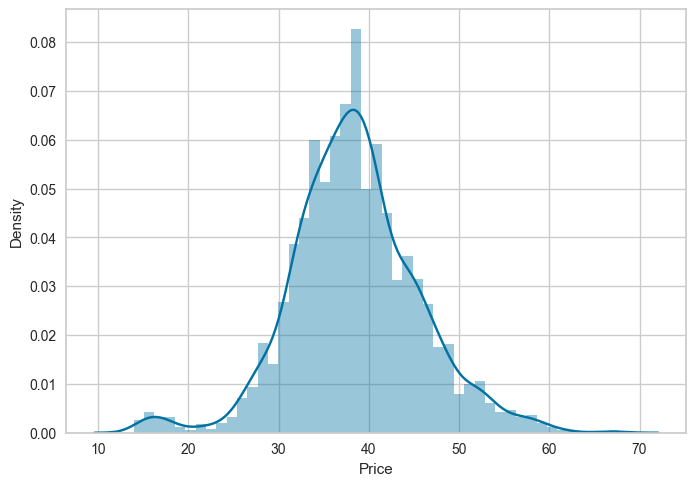

In [9]:
sns.distplot(norm.Price)

In [10]:
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\ariad\AppData\Local\Temp\joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['Year', 'Engine_Size', 'Mileage'],
                                    transformer=SimpleImputer())),
                ('categorical_impute...
Manual       1
NaN         -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Origin', 'Options'],
                                    transformer=OneHotEncoder(cols=['Origin',
                                                                    'Options'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Type', 'Region', 'Make'],
                                    transformer=TargetEncoder(cols=['Type',
                                                                    'Region',
                                                                    'Make'],
                                                              handle_missing='return_nan')))])

In [11]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:28:16
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,16265.6742,1116793420.0122,31327.2270,0.8172,0.5281,0.7574,0.5080
et,Extra Trees Regressor,16172.6047,1284835207.9249,33567.6319,0.7898,0.5580,0.7729,0.5600
gbr,Gradient Boosting Regressor,17834.6350,1283952847.2808,33697.2106,0.7891,0.5323,0.7598,0.4270
rf,Random Forest Regressor,16249.9953,1313008693.8895,33921.0028,0.7853,0.5454,0.7989,0.5810
lr,Linear Regression,22465.2364,1825435047.2837,41108.2659,0.6862,0.6201,0.8937,0.8880
ridge,Ridge Regression,22464.4922,1825491665.2564,41108.7799,0.6862,0.6201,0.8937,0.3100
lar,Least Angle Regression,22465.2364,1825435047.2838,41108.2659,0.6862,0.6201,0.8937,0.3000
br,Bayesian Ridge,22453.8293,1829097838.7448,41146.3430,0.6856,0.6199,0.8947,0.3900
en,Elastic Net,23890.2678,2090347399.7371,44184.3714,0.6375,0.6253,0.9565,0.2850
lasso,Lasso Regression,24414.5311,2172685297.5218,45129.2184,0.6214,0.6303,0.9785,0.3580


LGBMRegressor(n_jobs=-1, random_state=3516)

In [12]:
model = create_model('lightgbm', return_train_score=True)
model

LGBMRegressor(n_jobs=-1, random_state=3516)

In [13]:
predict_model(estimator=model, data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,16555.2174,1197331334.9432,34602.4758,0.7593,0.5349,0.8599


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price,prediction_label
3669,Yaris,Najran,Toyota,Automatic,Saudi,Full,2018,1.5,169000,14.713973,35632.463001
3620,Sportage,Qassim,Kia,Automatic,Other,Semi Full,2016,1.7,90000,38.291340,60043.973153
2526,Patrol,Jeddah,Nissan,Automatic,Saudi,Standard,2016,4.8,93000,41.266375,92400.364132
3495,Land Cruiser 70,Riyadh,Toyota,Manual,Saudi,Standard,2012,4.0,94000,42.498942,60547.537327
369,Elantra,Riyadh,Hyundai,Automatic,Saudi,Standard,2018,1.6,57000,35.887163,46667.128443
...,...,...,...,...,...,...,...,...,...,...,...
587,Charger,Jeddah,Dodge,Automatic,Other,Full,2014,3.6,300000,34.104427,51839.451669
172,Safrane,Jeddah,Renault,Automatic,Saudi,Full,2012,2.6,144000,30.064366,32187.730854
3429,Tahoe,Aseer,Chevrolet,Automatic,Other,Full,2008,3.9,300,32.697576,35799.954507
3774,Taurus,Riyadh,Ford,Automatic,Saudi,Standard,2019,3.5,62556,41.481372,75646.797143


In [14]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…